---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---



# Applied Machine Learning: Bets Data Science - IST

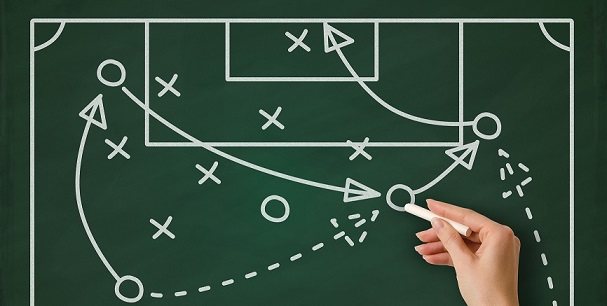

In [7]:
from IPython.core.display import Image
Image ('C:/Users/diogo.d.reis/Desktop/Noesis/Extra Work/Bets Data Science/1_Resources/logo3.png')
#<img src="C:/Users/diogo.d.reis/img/jm4.png", width=200,height=200> ->markdown
#![title](C:/Users/diogo.d.reis/img/jm4.png) ->markdown

## Dataset - Soccer History

In [3]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

# use the 'seaborn-colorblind' style
plt.style.use('seaborn')

%matplotlib notebook

In [2]:
data = pd.DataFrame() #creates a new dataframe that's empty

for name in glob.glob('./3_DataModel/3_1_CSV/*.csv'):
    data_i = pd.read_csv(name,decimal=".",sep=",",error_bad_lines=False,warn_bad_lines=False,parse_dates=['Date'])
    
    data_i['Season']=name   
    data = data.append(data_i, ignore_index = True)


data.shape

(82562, 84)

In [4]:
# cast Date field to datetime format
#pd.to_datetime(data['Date'])

# parse file name to Season field
data['Season']=data['Season'].apply(lambda x: 
                     x.split('_')[-2] +'/'+ x.split('_')[-1][0:2]
                    )

# show each column data type
data.dtypes

AC             float64
AF             float64
AR             float64
AS             float64
AST            float64
AY             float64
AwayTeam        object
B365A          float64
B365D          float64
B365H          float64
BSA             object
BSD            float64
BSH            float64
BWA            float64
BWD            float64
BWH            float64
Bb1X2          float64
BbAH           float64
BbAHh           object
BbAv<2.5       float64
BbAv>2.5       float64
BbAvA          float64
BbAvAHA        float64
BbAvAHH        float64
BbAvD          float64
BbAvH          float64
BbMx<2.5       float64
BbMx>2.5       float64
BbMxA          float64
BbMxAHA        float64
                ...   
IWH            float64
LBA            float64
LBD            float64
LBH            float64
PSA            float64
PSCA           float64
PSCD           float64
PSCH            object
PSD            float64
PSH            float64
Referee         object
SBA            float64
SBD        

In [5]:
# colums to select
columns_to_keep =[
                # Match Info
                'Div', 
                'Date', 
                'Referee',                 
                'HomeTeam', 
                'AwayTeam',
                'Season',
    
                # Half-Time and Full-Time Results
                'FTHG', 
                'FTAG', 
                'FTR',
                # 'HTHG', 
                # 'HTAG', 
                # 'HTR', 
    
                # Shots
                'HS', 
                'AS', 
                'HST', 
                'AST', 
    
                # Fouls
                'HF',
                'AF', 
    
                # Corners
                'HC', 
                'AC', 
    
                # Cards
                'HY', 
                'AY', 
                'HR', 
                'AR', 
    
                # Betbrain Odds
                'Bb1X2', 
                # 'BbMxH', 
                'BbAvH', 
                # 'BbMxD', 
                'BbAvD', 
                # 'BbMxA', 
                'BbAvA',
    
                # Under/Over
                'BbOU', 
                # 'BbMx>2.5', 
                'BbAv>2.5', 
                # 'BbMx<2.5', 
                'BbAv<2.5'
                # 'GB<2.5',
                # 'GB>2.5',
    
                # Asian Handicap
                # 'BbAH',
                # 'BbAHh', 
                # 'BbMxAHH', 
                # 'BbAvAHH', 
                # 'BbMxAHA', 
                # 'BbAvAHA', 
                # 'GBAH',
                # 'GBAHA',
                # 'GBAHH',
    
                # Bookmakers Odds
                # 'B365A',
                # 'B365D',
                # 'B365H',

                # 'BSA',
                # 'BSD',
                # 'BSH',

                # 'BWA',
                # 'BWD',
                # 'BWH',

                # 'IWA',
                # 'IWD',
                # 'IWH',

                # 'LBA',
                # 'LBD',
                # 'LBH',

                # 'PSCA',
                # 'PSCD',
                # 'PSCH',

                # 'PSA',
                # 'PSD',
                # 'PSH',

                # 'SBA',
                # 'SBD',
                # 'SBH',

                # 'SJA',
                # 'SJD',
                # 'SJH',

                # 'SOA',
                # 'SOD',
                # 'SOH',

                # 'VCA',
                # 'VCD',
                # 'VCH',

                # 'WHA',
                # 'WHD',
                # 'WHH',

                # 'GBA',
                # 'GBD',
                # 'GBH'
                ]

len(columns_to_keep)

28

In [6]:
filtered_data = data[columns_to_keep]

In [7]:
filtered_data.columns.values

array(['Div', 'Date', 'Referee', 'HomeTeam', 'AwayTeam', 'Season', 'FTHG',
       'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Bb1X2', 'BbAvH', 'BbAvD', 'BbAvA', 'BbOU',
       'BbAv>2.5', 'BbAv<2.5'], dtype=object)

In [8]:
filtered_data['Div'].value_counts()

E1     6624
E2     6624
E3     6624
I2     5544
SP2    5528
E0     4560
F1     4560
SP1    4560
I1     4560
F2     4528
D2     3672
D1     3672
N1     3640
T1     3622
B1     3114
P1     3112
G1     3012
SC0    2736
SC1    2160
Name: Div, dtype: int64

In [9]:
leagues_to_keep =[
    'E0',
    'SP1',
    'D1',
    'I1',
    'F1'  
]

In [159]:
leagues_to_keep2 =[
    'E0',
    'SP1',
    'D1',
    'I1',
    'P1',
    'F1' 
]

top_leagues2 = filtered_data.loc[filtered_data['Div'].isin(leagues_to_keep2)]

my_data2 = pd.merge(top_leagues2, df_leagues, on='Div')

my_data2.to_csv('C:/Users/diogo.d.reis/Desktop/Noesis/Clientes/2018/Global Media/AWS/Soccer Data/soccer_data.csv')

In [10]:
top_leagues = filtered_data.loc[filtered_data['Div'].isin(leagues_to_keep)]


In [11]:
top_leagues['Div'].value_counts()

SP1    4560
F1     4560
I1     4560
E0     4560
D1     3672
Name: Div, dtype: int64

In [12]:
top_leagues['Season'].value_counts()

2005/06    1826
2012/13    1826
2013/14    1826
2011/12    1826
2008/09    1826
2010/11    1826
2015/16    1826
2009/10    1826
2007/08    1826
2014/15    1826
2006/07    1826
2016/17    1826
Name: Season, dtype: int64

In [13]:
# Distribution Analysis

#df['ApplicantIncome'].hist(bins=50)
#df.boxplot(column='ApplicantIncome', by = 'Education')

# top_leagues[top_leagues['Season']=='2016/17'].apply(lambda x: sum(x.isnull())/len(x),axis=0) 
top_leagues.apply(lambda x: 100*sum(x.isnull())/len(x),axis=0) 

Div          0.000000
Date         0.000000
Referee     75.721066
HomeTeam     0.000000
AwayTeam     0.000000
Season       0.000000
FTHG         0.000000
FTAG         0.000000
FTR          0.000000
HS           0.077583
AS           0.077583
HST          1.474078
AST          1.474078
HF           3.532311
AF           3.532311
HC           1.788974
AC           1.788974
HY           0.013691
AY           0.009127
HR           0.009127
AR           0.009127
Bb1X2        0.004564
BbAvH        0.004564
BbAvD        0.004564
BbAvA        0.004564
BbOU         0.009127
BbAv>2.5     0.013691
BbAv<2.5     0.013691
dtype: float64

In [14]:
# show each column data type
top_leagues.dtypes

Div                 object
Date        datetime64[ns]
Referee             object
HomeTeam            object
AwayTeam            object
Season              object
FTHG               float64
FTAG               float64
FTR                 object
HS                 float64
AS                 float64
HST                float64
AST                float64
HF                 float64
AF                 float64
HC                 float64
AC                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
Bb1X2              float64
BbAvH              float64
BbAvD              float64
BbAvA              float64
BbOU               float64
BbAv>2.5           float64
BbAv<2.5           float64
dtype: object

In [15]:
top_leagues.describe()

,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,AY,HR,AR,Bb1X2,BbAvH,BbAvD,BbAvA,BbOU,BbAv>2.5,BbAv<2.5
count,21912.000000,21912.000000,21895.000000,21895.000000,21589.000000,21589.000000,21138.000000,21138.000000,21520.000000,21520.000000,...,21910.000000,21910.000000,21910.000000,21911.000000,21911.000000,21911.000000,21911.000000,21910.000000,21909.000000,21909.000000
mean,1.524598,1.127099,13.916967,11.088376,5.372643,4.195053,14.710332,15.221450,5.785688,4.474396,...,2.166591,0.102921,0.143314,42.620054,2.541689,3.683930,4.562262,34.614194,1.944060,1.894274
std,1.281492,1.121056,5.140170,4.518882,2.876810,2.479372,4.982134,5.102509,2.982013,2.579935,...,1.360353,0.325616,0.381339,7.447378,1.657176,1.082074,3.559511,6.294309,0.269591,0.368034
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.030000,1.290000,1.090000,4.000000,1.090000,1.370000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,11.000000,12.000000,4.000000,3.000000,...,1.000000,0.000000,0.000000,38.000000,1.690000,3.190000,2.630000,30.000000,1.750000,1.660000
50%,1.000000,1.000000,13.000000,11.000000,5.000000,4.000000,14.000000,15.000000,5.000000,4.000000,...,2.000000,0.000000,0.000000,42.000000,2.110000,3.340000,3.500000,34.000000,1.960000,1.800000
75%,2.000000,2.000000,17.000000,14.000000,7.000000,6.000000,18.000000,18.000000,8.000000,6.000000,...,3.000000,0.000000,0.000000,47.000000,2.670000,3.720000,5.110000,39.000000,2.130000,2.020000
max,10.000000,9.000000,44.000000,39.000000,24.000000,20.000000,48.000000,41.000000,22.000000,19.000000,...,9.000000,3.000000,4.000000,79.000000,29.080000,18.640000,42.740000,50.000000,3.040000,6.750000


<IPython.core.display.Javascript object>


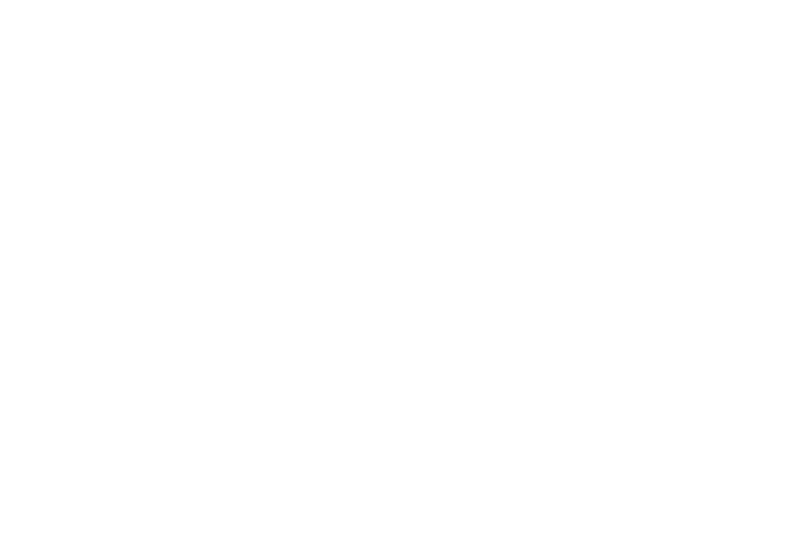

<IPython.core.display.Javascript object>


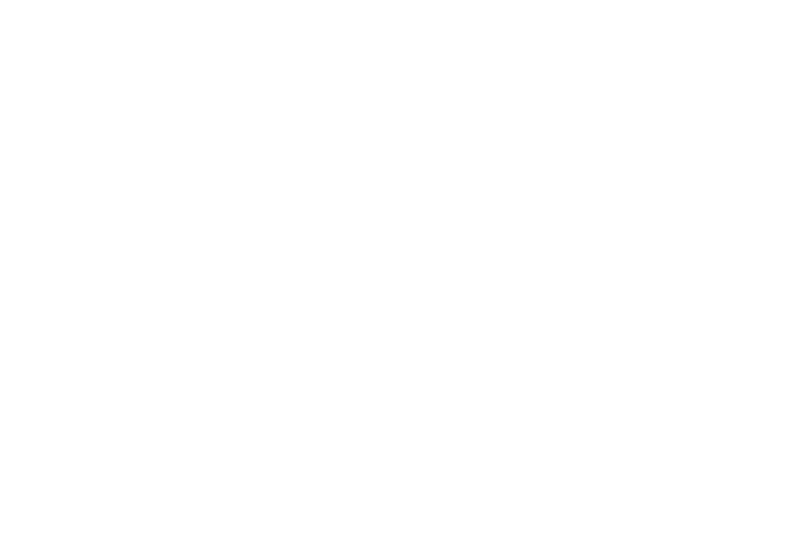

In [16]:
plt.clf()
plt.figure()

# Home Team goals distriution
plt.subplot(1, 2, 1)
plt.title("Home Goals Dist.")
top_leagues['FTHG'].hist(bins=10)

# Away Team goals distriution
plt.subplot(1, 2, 2)
plt.title("Away Goals Dist.")
top_leagues['FTAG'].hist(bins=10)


plt.show()

<IPython.core.display.Javascript object>


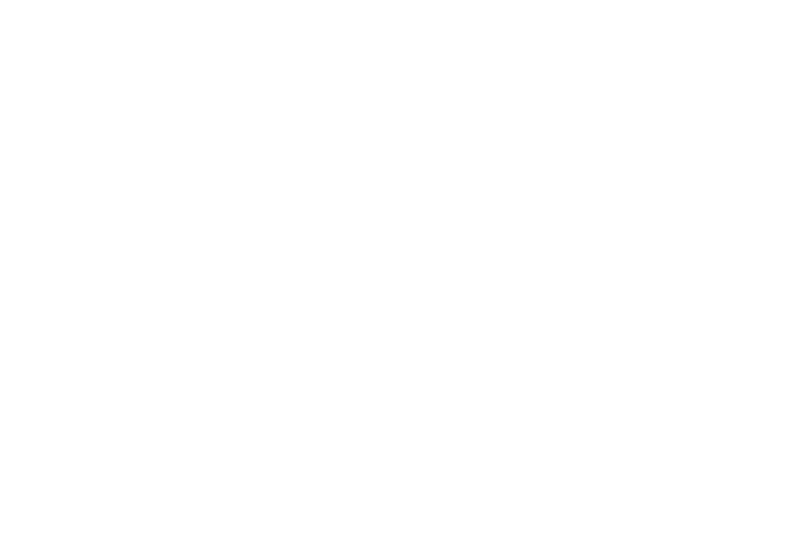

In [17]:
# Match outcome distriution
z = {'H': 'Home Win', 'D': 'Draw', 'A': 'Away Win'}

plt.clf()
plt.figure()
plt.title("Match Outcome Dist.")
top_leagues['FTR'].map(z).hist()
plt.show()

In [20]:
leagues = [
    {'Sort': 8 , 'Div': 'B1', 'Country': 'Belgium', '#Division': 1, 'League Name': 'Jupiler League'},
    {'Sort': 3, 'Div': 'D1', 'Country': 'Germany', '#Division': 1, 'League Name': 'Bundesliga I'},
    {'Sort': 14, 'Div': 'D2', 'Country': 'Germany', '#Division': 2, 'League Name': 'Bundesliga II'},
    {'Sort': 1, 'Div': 'E0', 'Country': 'England', '#Division': 1, 'League Name': 'Premier League'},
    {'Sort': 12, 'Div': 'E1', 'Country': 'England', '#Division': 2, 'League Name': 'Championship'},
    {'Sort': 18, 'Div': 'E2', 'Country': 'England', '#Division': 3, 'League Name': 'League One'},
    {'Sort': 19, 'Div': 'E3', 'Country': 'England', '#Division': 4, 'League Name': 'Leaque Two'},
    {'Sort': 5, 'Div': 'F1', 'Country': 'France', '#Division': 1, 'League Name': 'Ligue 1'},
    {'Sort': 15, 'Div': 'F2', 'Country': 'France', '#Division': 2, 'League Name': 'Ligue 2'},
    {'Sort': 4, 'Div': 'I1', 'Country': 'Italy', '#Division': 1, 'League Name': 'Serie A'},
    {'Sort': 16, 'Div': 'I2', 'Country': 'Italy', '#Division': 2, 'League Name': 'Serie B'},
    {'Sort': 9, 'Div': 'T1', 'Country': 'Turkey', '#Division': 1, 'League Name': 'Ligi 1'},
    {'Sort': 11, 'Div': 'G1', 'Country': 'Greek', '#Division': 1, 'League Name': 'Ethniki'},
    {'Sort': 7, 'Div': 'N1', 'Country': 'Netherlands', '#Division': 1, 'League Name': 'Eredivisie'},
    {'Sort': 6, 'Div': 'P1', 'Country': 'Portugal', '#Division': 1, 'League Name': 'Liga NOS'},
    {'Sort': 10, 'Div': 'SC0', 'Country': 'Scotland', '#Division': 1, 'League Name': 'Scottish Premiership'},
    {'Sort': 17, 'Div': 'SC1', 'Country': 'Scotland', '#Division': 2, 'League Name': 'Scottish League Two'},
    {'Sort': 2, 'Div': 'SP1', 'Country': 'Spain', '#Division': 1, 'League Name': 'La Liga'},
    {'Sort': 13, 'Div': 'SP2', 'Country': 'Spain', '#Division': 2, 'League Name': 'Liga Adelante'},
]

df_leagues = pd.DataFrame(leagues)

df_leagues.set_index('Sort',inplace=True)

In [21]:
df_leagues.sort_index()

,#Division,Country,Div,League Name
Sort,,,,
1,1,England,E0,Premier League
2,1,Spain,SP1,La Liga
3,1,Germany,D1,Bundesliga I
4,1,Italy,I1,Serie A
5,1,France,F1,Ligue 1
6,1,Portugal,P1,Liga NOS
7,1,Netherlands,N1,Eredivisie
8,1,Belgium,B1,Jupiler League
9,1,Turkey,T1,Ligi 1


In [22]:
my_data = pd.merge(top_leagues, df_leagues, on='Div')

<IPython.core.display.Javascript object>


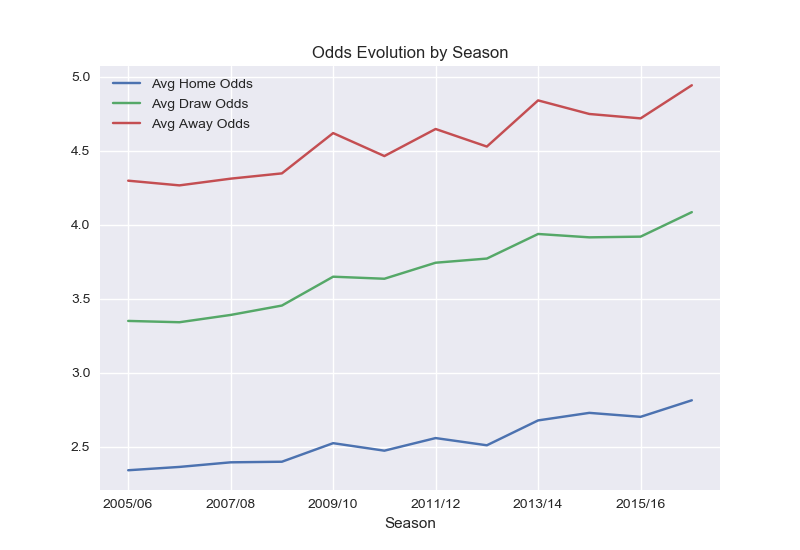

In [23]:
plt.clf()

plot_test = my_data.groupby(['Season'])['BbAvH','BbAvD','BbAvA'].apply(np.mean)
plot_test.columns = ['Avg Home Odds','Avg Draw Odds','Avg Away Odds']

plot_test.plot()
plt.title("Odds Evolution by Season")

plt.show()

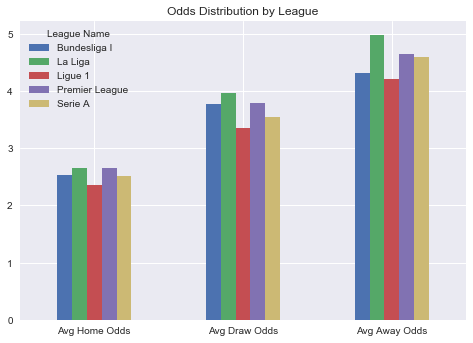

In [33]:
plt.clf()

plot_test_2 = my_data.groupby(['League Name'])['BbAvH','BbAvD','BbAvA'].apply(np.mean)
plot_test_2.columns = ['Avg Home Odds','Avg Draw Odds','Avg Away Odds']

plot_test_2.transpose().plot.bar()
plt.title("Odds Distribution by League")
plt.xticks(rotation='horizontal')

plt.show()

In [24]:
# & (my_data['Season'] == '2015/16')

premier_league = my_data[(my_data['Div']=='E0') ]

In [25]:
premier_league.columns.values

array(['Div', 'Date', 'Referee', 'HomeTeam', 'AwayTeam', 'Season', 'FTHG',
       'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Bb1X2', 'BbAvH', 'BbAvD', 'BbAvA', 'BbOU',
       'BbAv>2.5', 'BbAv<2.5', '#Division', 'Country', 'League Name'], dtype=object)

In [26]:
premier_league.apply(lambda x: 100*sum(x.isnull()),axis=0) 

Div            0
Date           0
Referee        0
HomeTeam       0
AwayTeam       0
Season         0
FTHG           0
FTAG           0
FTR            0
HS             0
AS             0
HST            0
AST            0
HF             0
AF             0
HC             0
AC             0
HY             0
AY             0
HR             0
AR             0
Bb1X2          0
BbAvH          0
BbAvD          0
BbAvA          0
BbOU           0
BbAv>2.5       0
BbAv<2.5       0
#Division      0
Country        0
League Name    0
dtype: int64

In [27]:
premier_league['Season'].value_counts()

2014/15    380
2008/09    380
2015/16    380
2006/07    380
2009/10    380
2016/17    380
2011/12    380
2005/06    380
2012/13    380
2007/08    380
2013/14    380
2010/11    380
Name: Season, dtype: int64

In [28]:
premier_league = premier_league[[ 'Season', 'Date', 'Referee', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR','BbAvH', 'BbAvD', 'BbAvA', 'BbAv>2.5', 'BbAv<2.5']]

In [29]:
premier_league[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]=premier_league[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']].apply(pd.to_numeric, downcast='integer')

In [30]:
premier_league[['Referee', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
                 'HC', 'AC','HY', 'AY', 'HR', 'AR','BbAvH', 'BbAvD', 'BbAvA', 'BbAv>2.5', 'BbAv<2.5']].head(1)

,Referee,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,BbAvH,BbAvD,BbAvA,BbAv>2.5,BbAv<2.5
3672,M Riley,Aston Villa,Bolton,3,13,2,6,14,16,7,8,0,2,0,0,2.2,3.16,3.05,2.01,1.7


## Features Extract

In [31]:
type(premier_league)

pandas.core.frame.DataFrame

In [65]:
#workdata = premier_league.head()

In [85]:
pd.options.mode.chained_assignment = None  # default='warn'

# Home team Points
premier_league.loc[premier_league['FTHG'] == premier_league['FTAG'], 'HomePoints'] = 1
premier_league.loc[premier_league['FTHG'] > premier_league['FTAG'], 'HomePoints'] = 3
premier_league.loc[premier_league['FTHG'] < premier_league['FTAG'], 'HomePoints'] = 0

# Away team Points
premier_league.loc[premier_league['FTHG'] == premier_league['FTAG'], 'AwayPoints'] = 1
premier_league.loc[premier_league['FTHG'] > premier_league['FTAG'], 'AwayPoints'] = 0
premier_league.loc[premier_league['FTHG'] < premier_league['FTAG'], 'AwayPoints'] = 3

pd.options.mode.chained_assignment = 'warn'  # default='warn'

In [117]:
premier_league[['FTHG','FTAG','HomePoints']].head()

,FTHG,FTAG,HomePoints
3672,2,2,1.0
3673,0,2,0.0
3674,0,0,1.0
3675,0,0,1.0
3676,0,0,1.0


In [202]:
premier_league_2016_17 = premier_league.loc[premier_league['Season']=='2016/17']

In [204]:
pd.DataFrame(premier_league_2016_17['Date'].unique(),columns=['Date']).sort_values(by='Date')

,Date
18,2016-01-10
19,2016-02-10
35,2016-03-12
36,2016-04-12
28,2016-05-11
37,2016-05-12
29,2016-06-11
0,2016-08-13
1,2016-08-14
2,2016-08-15


In [205]:
pd.DataFrame(premier_league_2016_17['Date'].unique(),columns=['Date']).sort_values(by='Date').iloc[0][0].day


10

In [262]:
temp_data_home = premier_league_2016_17[['Season', 'Date', 'HomeTeam', 'FTHG', 'FTAG', 'HomePoints']]
temp_data_away = premier_league_2016_17[['Season', 'Date', 'AwayTeam', 'FTHG', 'FTAG', 'AwayPoints']]

#burnley_temp_data_home = temp_data_home.loc[temp_data_home['HomeTeam']=='Burnley']

burnley_temp_data_home = temp_data_home

temp_data_home.head()

,Season,Date,HomeTeam,FTHG,FTAG,HomePoints
7914,2016/17,2016-01-10,Sunderland,1,1,1.0
7915,2016/17,2016-01-10,Swansea,1,2,0.0
7916,2016/17,2016-01-10,Watford,2,2,1.0
7917,2016/17,2016-01-10,West Ham,1,1,1.0
7913,2016/17,2016-01-10,Hull,0,2,0.0


In [265]:
temp_data = premier_league_2016_17[['Season', 'Date', 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'HomePoints', 'AwayPoints']].sort_values(by='Date')
temp_data['Date']

7914   2016-01-10
7915   2016-01-10
7916   2016-01-10
7917   2016-01-10
7913   2016-01-10
7918   2016-02-10
7919   2016-02-10
7920   2016-02-10
7921   2016-02-10
7982   2016-03-12
7988   2016-03-12
7986   2016-03-12
7987   2016-03-12
7985   2016-03-12
7984   2016-03-12
7983   2016-03-12
7989   2016-04-12
7990   2016-04-12
7953   2016-05-11
7954   2016-05-11
7955   2016-05-11
7956   2016-05-11
7952   2016-05-11
7991   2016-05-12
7957   2016-06-11
7958   2016-06-11
7959   2016-06-11
7960   2016-06-11
7961   2016-06-11
7852   2016-08-13
          ...    
8203   2017-07-05
8204   2017-07-05
8120   2017-08-03
8155   2017-08-04
8156   2017-08-04
8158   2017-08-04
8159   2017-08-04
8157   2017-08-04
8160   2017-08-04
8161   2017-08-04
8205   2017-08-05
8162   2017-09-04
8163   2017-09-04
8164   2017-10-04
8206   2017-10-05
8098   2017-11-02
8092   2017-11-02
8097   2017-11-02
8096   2017-11-02
8095   2017-11-02
8094   2017-11-02
8093   2017-11-02
8123   2017-11-03
8122   2017-11-03
8121   201

In [267]:
data_dev = temp_data

pd.options.mode.chained_assignment = None  # default='warn'

data_dev['HomePoints_Acum'] = data_dev.groupby(['Season','HomeTeam'])['HomePoints'].cumsum()
data_dev['AwayPoints_Acum'] = data_dev.groupby(['Season','AwayTeam'])['AwayPoints'].cumsum()

pd.options.mode.chained_assignment ='warn'

data_dev.loc[(data_dev['HomeTeam']=='Burnley') | (data_dev['AwayTeam']=='Burnley')]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,HomePoints,AwayPoints,HomePoints_Acum,AwayPoints_Acum
7918,2016/17,2016-02-10,Burnley,Arsenal,0,1,0.0,3.0,0.0,3.0
7984,2016/17,2016-03-12,Stoke,Burnley,2,0,3.0,0.0,3.0,0.0
7953,2016/17,2016-05-11,Burnley,Crystal Palace,3,2,3.0,0.0,3.0,0.0
7852,2016/17,2016-08-13,Burnley,Swansea,0,1,0.0,3.0,3.0,3.0
7863,2016/17,2016-08-20,Burnley,Liverpool,2,0,3.0,0.0,6.0,6.0
7872,2016/17,2016-08-27,Chelsea,Burnley,3,0,3.0,0.0,9.0,0.0
7895,2016/17,2016-09-17,Leicester,Burnley,3,0,3.0,0.0,8.0,0.0
7911,2016/17,2016-09-26,Burnley,Watford,2,0,3.0,0.0,9.0,1.0
7884,2016/17,2016-10-09,Burnley,Hull,1,1,1.0,1.0,10.0,4.0
7993,2016/17,2016-10-12,Burnley,Bournemouth,3,2,3.0,0.0,13.0,2.0


In [ ]:
temp_data.groupby(['month', 'item']).agg({'duration':sum,      # find the sum of the durations for each group
                                     'network_type': "count", # find the number of network type entries
                                     'date': 'first'}) 

In [250]:
#burnley_temp_data_home.groupby(['Season','Date','HomeTeam'])['HomePoints'].cumsum()

#temp_data_home.columns
pd.options.mode.chained_assignment = None  # default='warn'
temp_data_home['total_f'] = temp_data_home.groupby(['Season','HomeTeam'])['HomePoints'].cumsum()
#temp_data_home.loc[:,'Total_ff'] = temp_data_home.total_f.shift(1).fillna(0)
pd.options.mode.chained_assignment ='warn'

temp_data_home.loc[temp_data_home['HomeTeam']=='Burnley']

,Season,Date,HomeTeam,FTHG,FTAG,HomePoints,total_f,Total_ff
7852,2016/17,2016-08-13,Burnley,0,1,0.0,0.0,0.0
7863,2016/17,2016-08-20,Burnley,2,0,3.0,3.0,3.0
7884,2016/17,2016-10-09,Burnley,1,1,1.0,4.0,3.0
7911,2016/17,2016-09-26,Burnley,2,0,3.0,7.0,3.0
7918,2016/17,2016-02-10,Burnley,0,1,0.0,7.0,4.0
7934,2016/17,2016-10-22,Burnley,2,1,3.0,10.0,10.0
7953,2016/17,2016-05-11,Burnley,3,2,3.0,13.0,10.0
7972,2016/17,2016-11-26,Burnley,1,2,0.0,13.0,8.0
7993,2016/17,2016-10-12,Burnley,3,2,3.0,16.0,17.0
8023,2016/17,2016-12-26,Burnley,1,0,3.0,19.0,20.0


In [237]:
pd.options.mode.chained_assignment = None  # default='warn'

#temp_data_home = premier_league_2016_17[['Season', 'Date', 'HomeTeam', 'FTHG', 'FTAG', 'HomePoints']]
burnley_temp_data_home['Total'] = burnley_temp_data_home.groupby(['Season','Date','HomeTeam'])['HomePoints'].cumsum()

pd.options.mode.chained_assignment ='warn'

In [238]:
pd.options.mode.chained_assignment = None  # default='warn'

burnley_temp_data_home.loc[:,'Total_2'] = burnley_temp_data_home.Total.shift(1).fillna(0)

pd.options.mode.chained_assignment = default='warn'

burnley_temp_data_home.loc[burnley_temp_data_home['HomeTeam']=='Burnley']

,Season,Date,HomeTeam,FTHG,FTAG,HomePoints,Total,Total_2
7852,2016/17,2016-08-13,Burnley,0,1,0.0,0.0,0.0
7863,2016/17,2016-08-20,Burnley,2,0,3.0,3.0,3.0
7884,2016/17,2016-10-09,Burnley,1,1,1.0,1.0,3.0
7911,2016/17,2016-09-26,Burnley,2,0,3.0,3.0,0.0
7918,2016/17,2016-02-10,Burnley,0,1,0.0,0.0,1.0
7934,2016/17,2016-10-22,Burnley,2,1,3.0,3.0,1.0
7953,2016/17,2016-05-11,Burnley,3,2,3.0,3.0,0.0
7972,2016/17,2016-11-26,Burnley,1,2,0.0,0.0,3.0
7993,2016/17,2016-10-12,Burnley,3,2,3.0,3.0,3.0
8023,2016/17,2016-12-26,Burnley,1,0,3.0,3.0,3.0


In [177]:
pd.options.mode.chained_assignment = None  # default='warn'
#Soma acumulada dos pontos anteriores excepto do jogo atual (shift)
#premier_league_2016_27.groupby(['Date','HomeTeam'])['HomePoints'].sum()
#df.groupby(['name'])['no'].cumsum()
premier_league_2016_27['Total'] = premier_league_2016_27.groupby(['Date','HomeTeam'])['HomePoints'].cumsum()

#Soma acumulada dos pontos nos WINDOW 10 jogos anteriores 
#premier_league[['HomePoints']].rolling(window=10).sum()

#Soma acumulada dos pontos anteriores excepto do jogo atual (shift)
#premier_league[['HomePoints']].cumsum().shift().fillna(0)
pd.options.mode.chained_assignment ='warn'
premier_league_2016_27.head()

,Season,Date,Referee,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,HR,AR,BbAvH,BbAvD,BbAvA,BbAv>2.5,BbAv<2.5,HomePoints,AwayPoints,Total
7852,2016/17,2016-08-13,J Moss,Burnley,Swansea,0,1,A,10,17,...,0,0,2.43,3.21,3.10,2.30,1.61,0.0,3.0,0.0
7853,2016/17,2016-08-13,C Pawson,Crystal Palace,West Brom,0,1,A,14,13,...,0,0,2.01,3.23,4.16,2.50,1.52,0.0,3.0,0.0
7854,2016/17,2016-08-13,M Atkinson,Everton,Tottenham,1,1,D,12,13,...,0,0,3.12,3.32,2.36,2.05,1.77,1.0,1.0,1.0
7855,2016/17,2016-08-13,M Dean,Hull,Leicester,2,1,H,14,18,...,0,0,4.17,3.43,1.95,2.19,1.67,3.0,0.0,3.0
7856,2016/17,2016-08-13,R Madley,Man City,Sunderland,2,1,H,16,7,...,0,0,1.25,6.11,12.55,1.53,2.48,3.0,0.0,3.0


In [119]:
#Soma acumulada dos pontos nos WINDOW 10 jogos anteriores 
#premier_league[['HomePoints']].rolling(window=10).sum()

#Soma acumulada dos pontos anteriores excepto do jogo atual (shift)
premier_league[['HomePoints']].cumsum().shift().fillna(0)

,HomePoints
3672,0.0
3673,1.0
3674,1.0
3675,2.0
3676,3.0
3677,4.0
3678,4.0
3679,4.0
3680,7.0
3681,10.0


In [102]:
#my_data['League Name'].value_counts()
my_data.groupby('League Name').Date.nunique().sum()

5746

In [110]:
np.min(premier_league[premier_league['Season']=='2016/17'].Date)

Timestamp('2016-01-10 00:00:00')

In [146]:
# & (my_data['Season'] == '2015/16')
# movies[(movies.duration >= 200) | (movies.genre == 'Drama')]
premier_league[(premier_league['Season'] == '2015/16' )&((premier_league['HomeTeam']=='Sunderland') | (premier_league['AwayTeam']=='Sunderland'))]

,Season,Date,Referee,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AC,HY,AY,HR,AR,BbAvH,BbAvD,BbAvA,BbAv>2.5,BbAv<2.5
7475,2015/16,2015-08-08,L Mason,Leicester,Sunderland,4,2,H,19,10,...,3,2,4,0,0,1.96,3.37,4.06,2.18,1.67
7484,2015/16,2015-08-15,K Friend,Sunderland,Norwich,1,3,A,6,19,...,6,1,2,0,0,2.47,3.20,3.01,2.26,1.63
7496,2015/16,2015-08-22,N Swarbrick,Sunderland,Swansea,1,1,D,10,20,...,4,4,2,0,0,3.74,3.33,2.07,2.18,1.67
7502,2015/16,2015-08-29,R Madley,Aston Villa,Sunderland,2,2,D,21,7,...,4,2,1,0,0,1.89,3.42,4.38,2.22,1.64
7520,2015/16,2015-09-13,C Pawson,Sunderland,Tottenham,0,1,A,12,15,...,8,2,1,0,0,4.14,3.49,1.92,1.95,1.85
7523,2015/16,2015-09-19,K Friend,Bournemouth,Sunderland,2,0,H,15,9,...,3,2,4,0,1,1.70,3.79,5.14,1.87,1.93
7534,2015/16,2015-09-26,M Jones,Man United,Sunderland,3,0,H,12,9,...,2,0,3,0,0,1.21,6.57,13.85,1.56,2.38
7548,2015/16,2015-03-10,N Swarbrick,Sunderland,West Ham,2,2,D,12,20,...,8,2,4,1,0,3.05,3.34,2.37,1.94,1.86
7559,2015/16,2015-10-17,M Atkinson,West Brom,Sunderland,1,0,H,8,9,...,5,2,2,0,0,2.03,3.28,3.95,2.27,1.62
7571,2015/16,2015-10-25,R Madley,Sunderland,Newcastle,3,0,H,9,21,...,10,0,2,0,1,2.53,3.31,2.86,1.95,1.85


In [36]:
#premier_league.loc[8208]
#premier_league.loc[7952]


from dateutil.parser import parse

(premier_league.loc[7918]['Date'])

#(premier_league.loc[7918]['Date']).month

Timestamp('2016-02-10 00:00:00')

## Model

In [72]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)
#premier_league[[ 'Season', 'Date', 'Referee', 'HomeTeam', 'AwayTeam', 'FTHG',
#       'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
#       'HY', 'AY', 'HR', 'AR','BbAvH', 'BbAvD', 'BbAvA', 'BbAv>2.5', 'BbAv<2.5']]
#'Referee', 'HomeTeam', 'AwayTeam',

feature_names = [ 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
                 'HC', 'AC','HY', 'AY', 'HR', 'AR','BbAvH', 'BbAvD', 'BbAvA', 'BbAv>2.5', 'BbAv<2.5']

X_premier_league = premier_league[feature_names]
y_premier_league = premier_league['FTR']
target_names = ['Home Win', 'Draw', 'Away Win']

X_train, X_test, y_train, y_test = train_test_split(X_premier_league, y_premier_league, random_state=0)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
## we must apply the scaling to the test set that we computed for the training set
#X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

# 'M Riley','Aston Villa', 'Bolton'
example_match = [[3,13,2,6,14,16,7,8,0,2,0,0,2.2,3.16,3.05,2.01,1.7]]
#example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted outcome for the match:\n ', example_match, '\n is ', 
          knn.predict(example_match)[0])

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.49
Predicted outcome for the match:
  [[3, 13, 2, 6, 14, 16, 7, 8, 0, 2, 0, 0, 2.2, 3.16, 3.05, 2.01, 1.7]] 
 is  D


In [73]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
from sklearn.naive_bayes import GaussianNB
#from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_premier_league, y_premier_league, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Premier League Dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Premier League Dataset
Accuracy of GaussianNB classifier on training set: 0.52
Accuracy of GaussianNB classifier on test set: 0.50


In [83]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_premier_league, y_premier_league, random_state=0)

clf = RandomForestClassifier(max_features = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.51


In [89]:
clf.feature_importances_

array([ 0.06,  0.06,  0.07,  0.07,  0.05,  0.06,  0.06,  0.05,  0.04,
        0.04,  0.01,  0.01,  0.1 ,  0.07,  0.11,  0.07,  0.07])

In [90]:
feature_names

['HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'BbAvH',
 'BbAvD',
 'BbAvA',
 'BbAv>2.5',
 'BbAv<2.5']

In [93]:
X_premier_league.shape

(4560, 17)

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_premier_league, y_premier_league, random_state=0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Premier League dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Premier League dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Premier League dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 0.69
Accuracy of GBDT classifier on test set: 0.59

Premier League dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.57
Accuracy of GBDT classifier on test set: 0.56


In [102]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_premier_league, y_premier_league, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

<IPython.core.display.Javascript object>

TypeError: Can't convert 'int' object to str implicitly

In [147]:
leagues = [
    {'Sort': 8 , 'Div': 'B1', 'Country': 'Belgium', '#Division': 1, 'League Name': 'Jupiler League'},
    {'Sort': 3, 'Div': 'D1', 'Country': 'Germany', '#Division': 1, 'League Name': 'Bundesliga I'},
    {'Sort': 14, 'Div': 'D2', 'Country': 'Germany', '#Division': 2, 'League Name': 'Bundesliga II'},
    {'Sort': 1, 'Div': 'E0', 'Country': 'England', '#Division': 1, 'League Name': 'Premier League'},
    {'Sort': 12, 'Div': 'E1', 'Country': 'England', '#Division': 2, 'League Name': 'Championship'},
    {'Sort': 18, 'Div': 'E2', 'Country': 'England', '#Division': 3, 'League Name': 'League One'},
    {'Sort': 19, 'Div': 'E3', 'Country': 'England', '#Division': 4, 'League Name': 'Leaque Two'},
    {'Sort': 5, 'Div': 'F1', 'Country': 'France', '#Division': 1, 'League Name': 'Ligue 1'},
    {'Sort': 15, 'Div': 'F2', 'Country': 'France', '#Division': 2, 'League Name': 'Ligue 2'},
    {'Sort': 4, 'Div': 'I1', 'Country': 'Italy', '#Division': 1, 'League Name': 'Serie A'},
    {'Sort': 16, 'Div': 'I2', 'Country': 'Italy', '#Division': 2, 'League Name': 'Serie B'},
    {'Sort': 9, 'Div': 'T1', 'Country': 'Turkey', '#Division': 1, 'League Name': 'Ligi 1'},
    {'Sort': 11, 'Div': 'G1', 'Country': 'Greek', '#Division': 1, 'League Name': 'Ethniki'},
    {'Sort': 7, 'Div': 'N1', 'Country': 'Netherlands', '#Division': 1, 'League Name': 'Eredivisie'},
    {'Sort': 6, 'Div': 'P1', 'Country': 'Portugal', '#Division': 1, 'League Name': 'Liga NOS'},
    {'Sort': 10, 'Div': 'SC0', 'Country': 'Scotland', '#Division': 1, 'League Name': 'Scottish Premiership'},
    {'Sort': 17, 'Div': 'SC1', 'Country': 'Scotland', '#Division': 2, 'League Name': 'Scottish League Two'},
    {'Sort': 2, 'Div': 'SP1', 'Country': 'Spain', '#Division': 1, 'League Name': 'La Liga'},
    {'Sort': 13, 'Div': 'SP2', 'Country': 'Spain', '#Division': 2, 'League Name': 'Liga Adelante'},
]

In [152]:

import pandas as pd

df_leagues = pd.DataFrame(leagues)
df_leagues.to_csv('C:/Users/diogo.d.reis/Desktop/Noesis/Clientes/2018/Global Media/AWS/Soccer Data/leagues_desc.csv')

In [153]:
top_leagues.to_csv('C:/Users/diogo.d.reis/Desktop/Noesis/Clientes/2018/Global Media/AWS/Soccer Data/top_leagues_data.csv')

In [154]:
soccer_data = pd.merge(top_leagues, df_leagues, on='Div')
soccer_data.to_csv('C:/Users/diogo.d.reis/Desktop/Noesis/Clientes/2018/Global Media/AWS/Soccer Data/soccer_data.csv')